# Background

__The veteran dataset contains 44 variables that describes the features for givers and non-givers for a charity campaign. The label that defines a donation is Target_B.__ 


- Target_B = 1: donation
- Target_B = 0: No donation 

__Below is an example how to apply a random forrest model on the data in order to predict the likelihood for donation. The model is evaulated with a so called ROC curve__

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pylab as plt 

# Necessary Sklearn objects used in the analysis
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion




/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


__Import data into a dataframe. Look at the 10 first observations__

In [2]:
df = pd.read_csv("veteran_brutto.csv" )

df.head(10)

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,PER_CAPITA_INCOME
0,0,101,87.0,0,?,?,.,H,M,2.0,...,8.49,15.0,20.0,5.0,15.0,5,12,26,92,11855
1,1,137,79.0,0,R,2,45,H,M,7.0,...,14.72,20.0,25.0,5.0,17.0,7,21,7,122,10385
2,0,113,75.0,0,S,1,11,H,F,5.0,...,16.75,23.0,28.0,5.0,19.0,11,32,6,105,30855
3,0,92,NaN,0,U,2,04,H,F,6.0,...,11.76,14.0,17.0,3.0,15.0,11,33,6,92,16342
4,0,101,74.0,0,R,2,49,U,F,2.0,...,8.83,20.0,25.0,5.0,25.0,6,19,18,92,12107
5,0,101,63.0,0,U,3,08,U,M,3.0,...,5.82,7.0,10.0,3.0,10.0,9,20,19,91,6851
6,0,89,71.0,0,R,3,50,H,M,5.0,...,11.00,15.0,20.0,5.0,20.0,7,18,21,91,5900
7,1,89,79.0,0,C,2,28,H,F,1.0,...,5.05,4.0,7.0,3.0,5.0,9,24,9,91,12667
8,0,89,41.0,0,C,3,30,H,F,4.0,...,5.03,4.0,7.0,3.0,5.0,11,25,17,91,8132
9,1,101,63.0,0,R,2,43,H,F,4.0,...,6.82,8.0,11.0,3.0,8.0,11,27,9,91,11428


In [3]:
# Vilka variabler och datatyper har vi?
print(df.dtypes)

TARGET_B                        int64
MONTHS_SINCE_ORIGIN             int64
DONOR_AGE                     float64
IN_HOUSE                        int64
URBANICITY                     object
SES                            object
CLUSTER_CODE                   object
HOME_OWNER                     object
DONOR_GENDER                   object
INCOME_GROUP                  float64
PUBLISHED_PHONE                 int64
OVERLAY_SOURCE                 object
MOR_HIT_RATE                    int64
WEALTH_RATING                 float64
MEDIAN_HOME_VALUE               int64
MEDIAN_HOUSEHOLD_INCOME         int64
PCT_OWNER_OCCUPIED              int64
PCT_MALE_MILITARY               int64
PCT_MALE_VETERANS               int64
PCT_VIETNAM_VETERANS            int64
PCT_WWII_VETERANS               int64
PEP_STAR                        int64
RECENT_STAR_STATUS              int64
RECENCY_STATUS_96NK            object
FREQUENCY_STATUS_97NK           int64
RECENT_RESPONSE_PROP          float64
RECENT_AVG_G

### Nu vill vi göra en klassificeringsmodell för att prediktera sannolikhet för donation. Vill skapa ett dynamiskt flöde för att hantera alla olika datatyper

### Först måste vi separera kategori variabler från numeriska - dessa ska hanteras på olika sätt
* Kategorivariabler - skapa dummy variabler
* Numeriska variabler - standardisera

In [4]:
for i in df.columns:
    print(i)

TARGET_B
MONTHS_SINCE_ORIGIN
DONOR_AGE
IN_HOUSE
URBANICITY
SES
CLUSTER_CODE
HOME_OWNER
DONOR_GENDER
INCOME_GROUP
PUBLISHED_PHONE
OVERLAY_SOURCE
MOR_HIT_RATE
WEALTH_RATING
MEDIAN_HOME_VALUE
MEDIAN_HOUSEHOLD_INCOME
PCT_OWNER_OCCUPIED
PCT_MALE_MILITARY
PCT_MALE_VETERANS
PCT_VIETNAM_VETERANS
PCT_WWII_VETERANS
PEP_STAR
RECENT_STAR_STATUS
RECENCY_STATUS_96NK
FREQUENCY_STATUS_97NK
RECENT_RESPONSE_PROP
RECENT_AVG_GIFT_AMT
RECENT_CARD_RESPONSE_PROP
RECENT_AVG_CARD_GIFT_AMT
RECENT_RESPONSE_COUNT
RECENT_CARD_RESPONSE_COUNT
LIFETIME_CARD_PROM
LIFETIME_PROM
LIFETIME_GIFT_AMOUNT
LIFETIME_GIFT_COUNT
LIFETIME_AVG_GIFT_AMT
LIFETIME_GIFT_RANGE
LIFETIME_MAX_GIFT_AMT
LIFETIME_MIN_GIFT_AMT
LAST_GIFT_AMT
CARD_PROM_12
NUMBER_PROM_12
MONTHS_SINCE_LAST_GIFT
MONTHS_SINCE_FIRST_GIFT
PER_CAPITA_INCOME


In [5]:
for i in df.dtypes:
    print(i)

int64
int64
float64
int64
object
object
object
object
object
float64
int64
object
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
float64
float64
float64
float64
int64
int64
int64
int64
float64
int64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64


In [6]:
num_attribs = []
cat_attribs = []
for var, typ in zip(df.columns[1:], df.dtypes[1:]):
    if typ == 'object':
        cat_attribs.append(var)
    else:
        num_attribs.append(var)       

In [7]:
num_attribs

['MONTHS_SINCE_ORIGIN',
 'DONOR_AGE',
 'IN_HOUSE',
 'INCOME_GROUP',
 'PUBLISHED_PHONE',
 'MOR_HIT_RATE',
 'WEALTH_RATING',
 'MEDIAN_HOME_VALUE',
 'MEDIAN_HOUSEHOLD_INCOME',
 'PCT_OWNER_OCCUPIED',
 'PCT_MALE_MILITARY',
 'PCT_MALE_VETERANS',
 'PCT_VIETNAM_VETERANS',
 'PCT_WWII_VETERANS',
 'PEP_STAR',
 'RECENT_STAR_STATUS',
 'FREQUENCY_STATUS_97NK',
 'RECENT_RESPONSE_PROP',
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_AVG_CARD_GIFT_AMT',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'LIFETIME_CARD_PROM',
 'LIFETIME_PROM',
 'LIFETIME_GIFT_AMOUNT',
 'LIFETIME_GIFT_COUNT',
 'LIFETIME_AVG_GIFT_AMT',
 'LIFETIME_GIFT_RANGE',
 'LIFETIME_MAX_GIFT_AMT',
 'LIFETIME_MIN_GIFT_AMT',
 'LAST_GIFT_AMT',
 'CARD_PROM_12',
 'NUMBER_PROM_12',
 'MONTHS_SINCE_LAST_GIFT',
 'MONTHS_SINCE_FIRST_GIFT',
 'PER_CAPITA_INCOME']

In [8]:
cat_attribs

['URBANICITY',
 'SES',
 'CLUSTER_CODE',
 'HOME_OWNER',
 'DONOR_GENDER',
 'OVERLAY_SOURCE',
 'RECENCY_STATUS_96NK']

### Sedan har jag analyserat varje kaegorivariabel enligt nedan, inte med i notebooken

In [9]:
df['DONOR_GENDER'].value_counts()

F    10401
M     7953
U     1017
A        1
Name: DONOR_GENDER, dtype: int64

In [10]:
### Väljer enbart observationer om man är man eller kvinna

df_subset = df[(df['DONOR_GENDER'] == 'F') | (df['DONOR_GENDER'] == 'M')]

In [11]:
len(df_subset)

18354

### Sätter upp en pipeline som gör det möjligt att hantera flödet dynamiskt

In [12]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
# Denna klass måste vi göra för att särskilja numeriska variabler mot character variabler
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [13]:
# Egen klass för att sätta dummyvariabler

class SetDummyVar(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        tempdf = pd.get_dummies(X[self.attribute_names], columns = self.attribute_names)
        return tempdf.values

In [14]:
# Pipeline för numeriska variabler
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('standard', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('dummy_cat', SetDummyVar(cat_attribs)),
    ])

In [15]:
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

### In order to avoid overfitting data is split into training data and validation data. 75% träningsdata och 25% valideringsdata


In [16]:
df_subset['is_train']=np.random.uniform(0,1,len(df_subset))<=0.75

train, validate = df_subset[df_subset['is_train']==True], df_subset[df_subset['is_train']==False]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
len(train)

13819

In [18]:
len(validate)

4535

### Nu skapar vi arrayer som ska användas av modellen - använder den skapade Pipelineobjektet som gör alla nödvändiga dataransformationer 

In [19]:
# Träningssdata
# Alla förklaringsvaribler i en multidimensionell array där kategrisvaribler har gjorts om till
# dummyvariabler
features_train = full_pipeline.fit_transform(train)
## En array som håller det vi vill predikter
label_train = train["TARGET_B"].copy()

In [20]:
# Valideringsdata
# Alla förklaringsvaribler i en multidimensionell array där kategrisvaribler har gjorts om till
# dummyvariabler
features_validate = full_pipeline.fit_transform(validate)
## En array som håller det vi vill predikter
label_validate = validate["TARGET_B"].copy()


In [21]:
type(features_train)

numpy.ndarray

In [22]:
type(label_train)

pandas.core.series.Series

# Train the model on the training data and then evaluate on the validation data

- predicts: A twodimensional array that contains posterrior probabbility for a donation behaviour, one for non-donation and one for donation
- fpr : False positive rate, number of false positive for a specific threshold value
- tpr : True positive rate, number of true positive for a specific threshold value
- threshold: Sorted threshold (descending) values for the likelihod to donate
- roc_auc: Receiver operating characteristics. A value close to 1 indicates a strong model. A value close to 0.5 means that the model is rather poor

In [23]:
# Bygger random forrest och analyserar roc_auc
# Instansierar modellen
rf = RandomForestClassifier(n_estimators = 1000, max_depth=5)

# Tränar modellen

rf.fit(features_train,label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
# Predikterar med modellen med valideringsdata

predict = rf.predict_proba(features_validate)

fpr, tpr, threshold = roc_curve(label_validate,predict[:,1])

roc_auc = auc(fpr,tpr)

# A ROC curve for the charity classifier on the charity data

__It traces out two types of error as we vary the threshold value for the posterior probability of charity. The actual thresholds are not shown. The true positive rate is the sensitivity: the fraction of givers that are correctly identified, using a given threshold value. The false positive rate is 1-specificity: the fraction of non-givers that we classify incorrectly as givers, using that same threshold value. The ideal ROC curve hugs the top left corner, indicating a high true positive rate and a low false positive rate. The dotted line represents the “no information” classifier.__ 


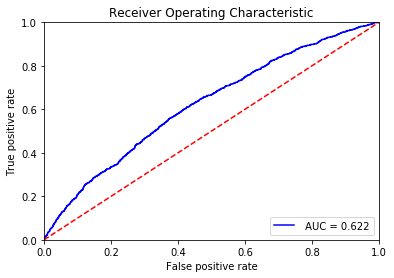

In [25]:
# Graf

plt.title('Receiver Operating Characteristic') 
plt.plot( fpr, tpr, 'b', label =' AUC = %0.3f' % roc_auc) 
plt.legend( loc ='lower right') 
plt.plot([ 0, 1], [0, 1], 'r--') 
plt.xlim([ 0.0, 1.0]) 
plt.ylim([ 0.0, 1.0]) 
plt.ylabel('True positive rate') 
plt.xlabel('False positive rate') 
plt.show()